# Analyze the types of batches in the manifest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = 7, 6

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("combined-manifest.csv")

In [4]:
df.head()

,batch,image
0,1-1-1,195
1,1-1-2,234
2,1-1-3,147
3,1-1-4,213
4,1-1-5,243


In [5]:
def classify_batch(row):
    """Return the type of a batch based on the row's batch name.
    There is a single batch for all the eSlate devices in
    a single multi-precinct polling place.

    >>> classify_batch({'batch': '1-1-1'})
    'hand_marked'
    >>> classify_batch({'batch': 'early71373'})
    'eSlates_early'
    >>> classify_batch({'batch': '2012'})
    'eSlates_polling'
    """

    if row['batch'].startswith('early'):
        return 'eSlates_early'
    elif row['batch'].count('-') < 2:
        return 'eSlates_polling'
    else:
        return 'hand_marked'

In [6]:
# Create a new column showing the batch type
df['batchtype'] = df.apply(classify_batch, axis=1)

In [7]:
df.head()

,batch,image,batchtype
0,1-1-1,195,hand_marked
1,1-1-2,234,hand_marked
2,1-1-3,147,hand_marked
3,1-1-4,213,hand_marked
4,1-1-5,243,hand_marked


In [8]:
df.groupby(['batchtype']).agg(['median', 'mean', 'count'])

image                  
                median        mean count
batchtype                               
eSlates_early        1    2.706598  1561
eSlates_polling    220  227.228484   976
hand_marked        282  268.012941  4559

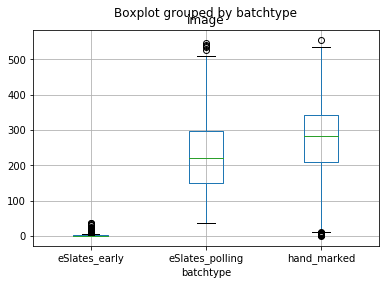

In [9]:
df.boxplot('image', by='batchtype');

In [10]:
df.describe()

,image
count,7096.000000
mean,204.040445
std,137.713971
min,0.000000
25%,72.000000
50%,232.000000
75%,318.000000
max,555.000000


batchtype
eSlates_early      AxesSubplot(0.125,0.125;0.775x0.755)
eSlates_polling    AxesSubplot(0.125,0.125;0.775x0.755)
hand_marked        AxesSubplot(0.125,0.125;0.775x0.755)
Name: image, dtype: object

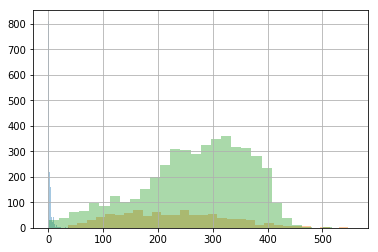

In [11]:
df.groupby("batchtype").image.hist(bins=30, alpha=0.4)

In [12]:
df.hist(bins=50, by);

SyntaxError: positional argument follows keyword argument (<ipython-input-12-72b3a75f36e2>, line 1)

/usr/lib/python3/dist-packages/pandas/plotting/_core.py:2166: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yrot=yrot, **kwds)


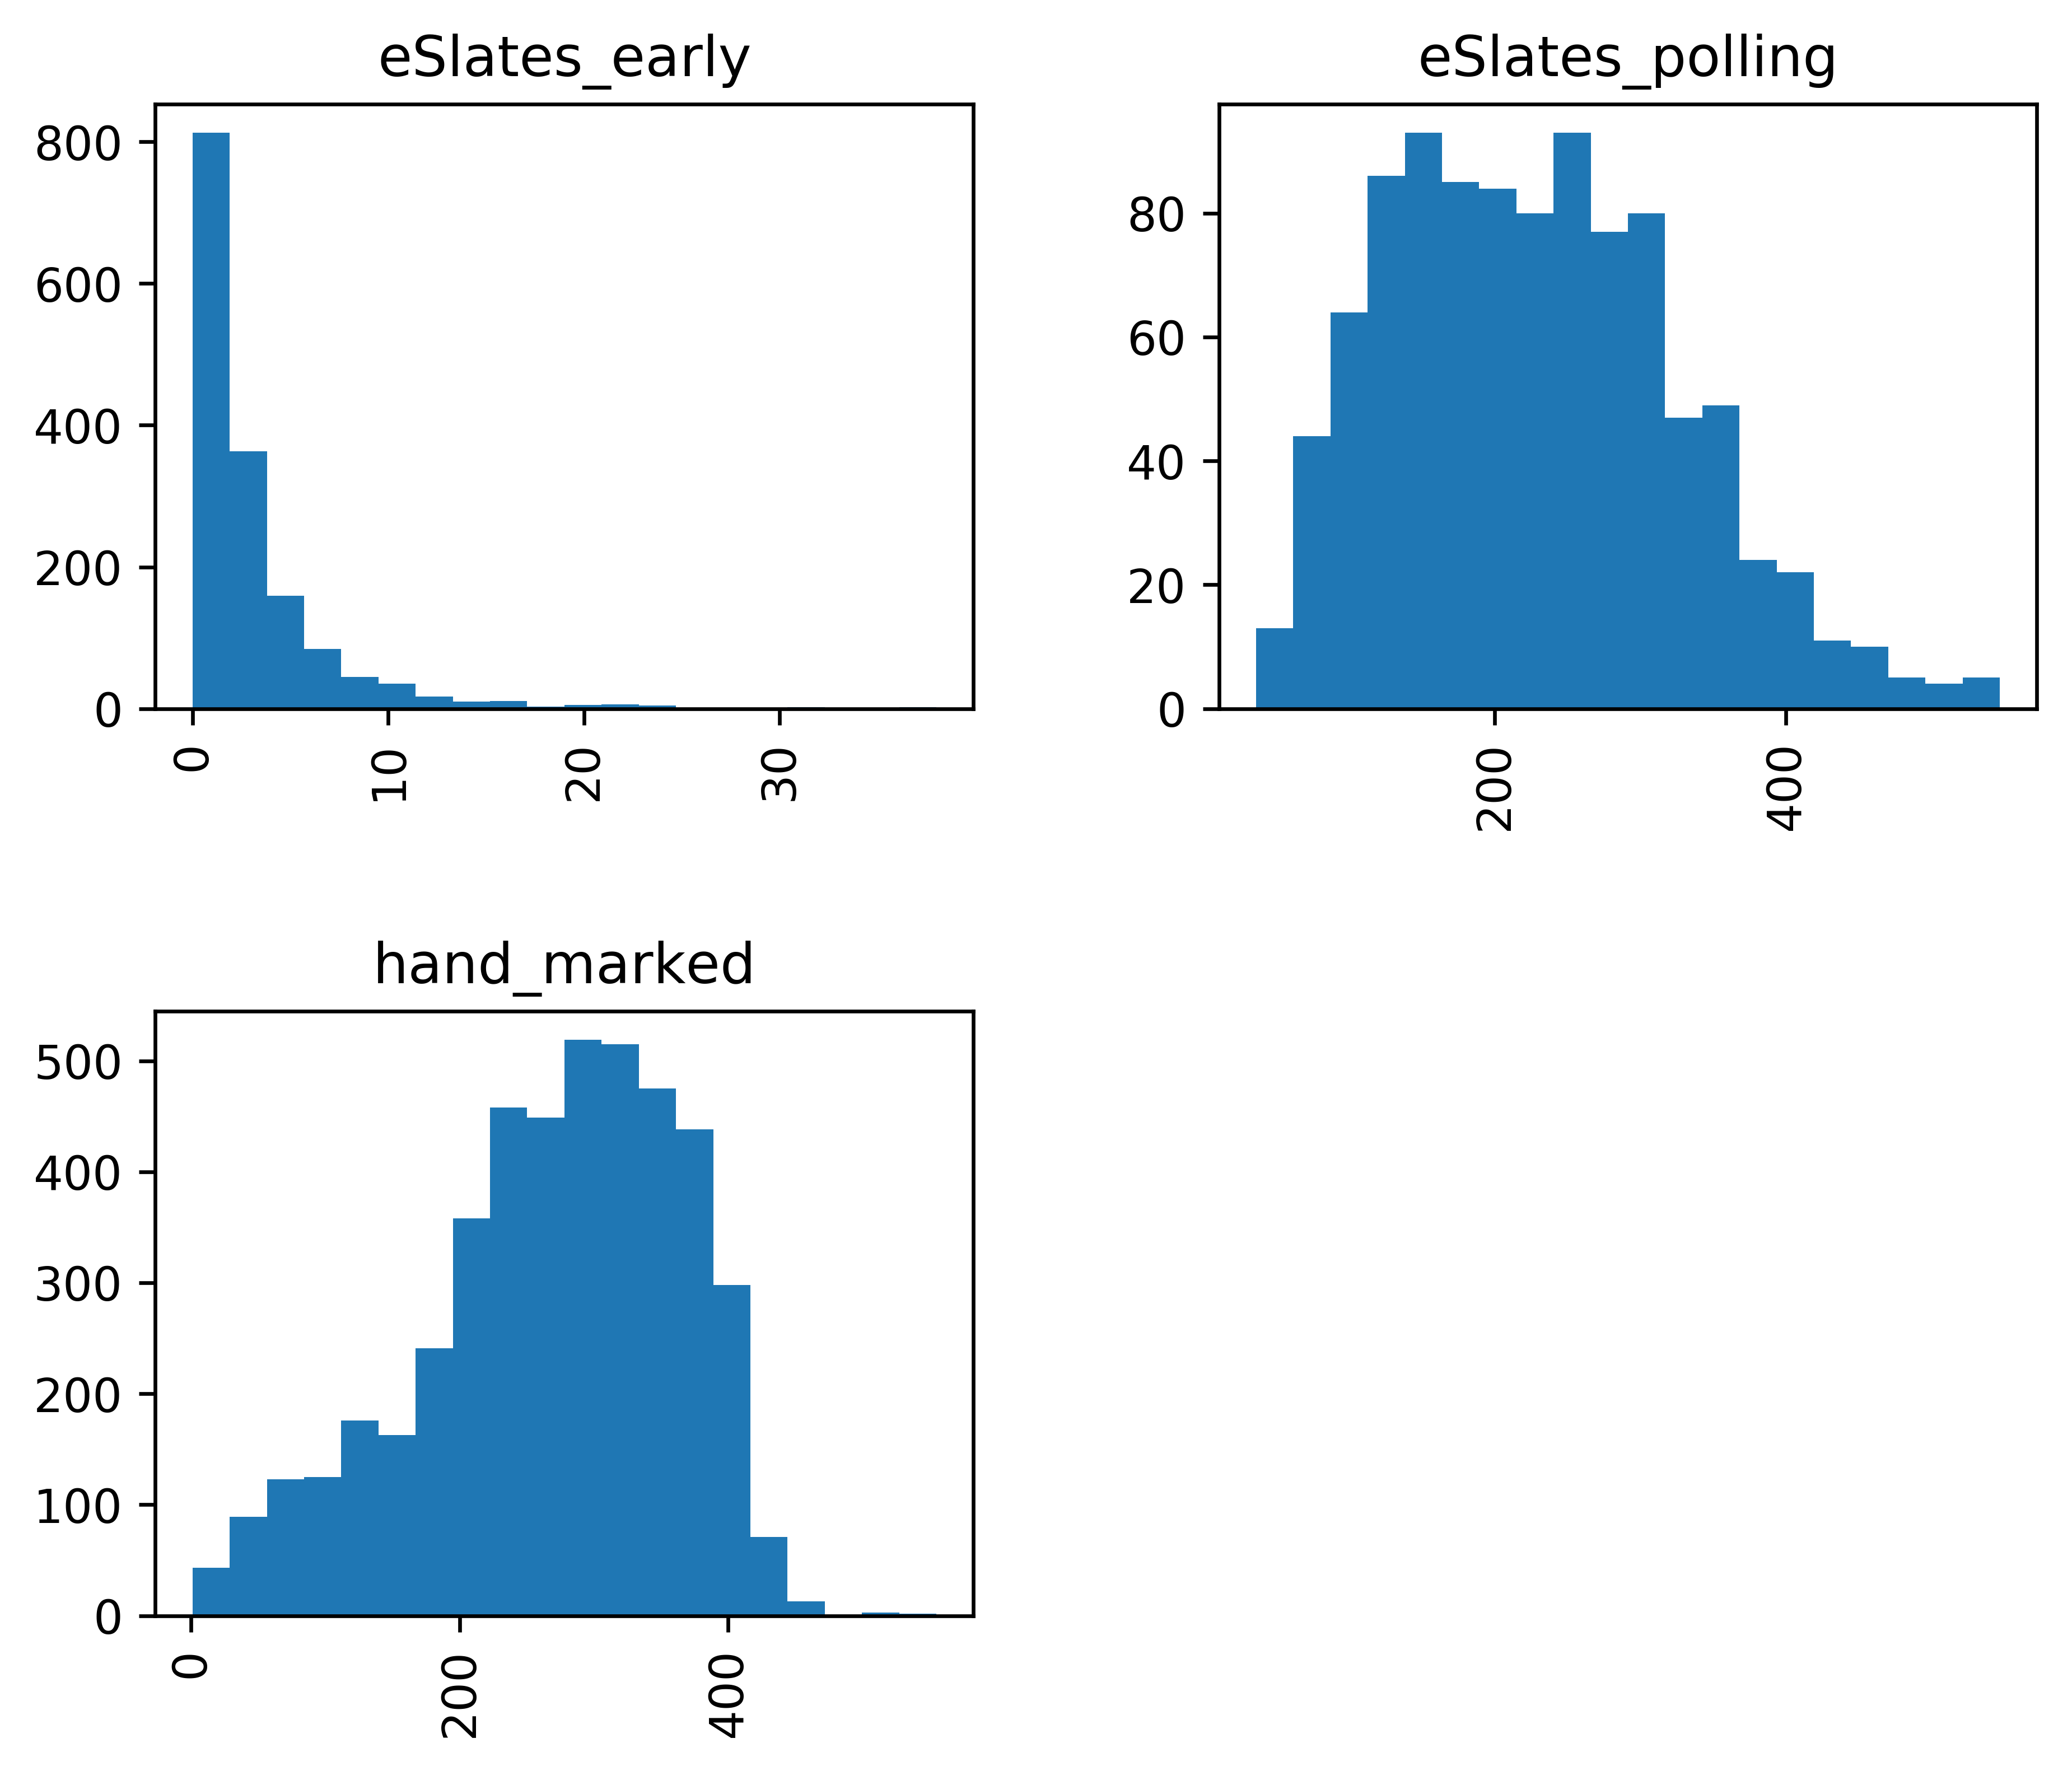

In [13]:
fig, ax = plt.subplots(figsize=(7, 6), dpi=600)
ax.set(title="hi", xlabel="Batch size")
df.hist(ax=ax, bins=20, by="batchtype");

In [14]:
fig.savefig('batch_size_by_batchtype.png', bbox_inches='tight')

In [15]:
import doctest
doctest.testmod()

TestResults(failed=0, attempted=3)